# Fundamental solution for Poisson equation

Poisson equation is given by

$$\nabla^2 u(\mathbf{x}) = f(\mathbf{x})\quad$$

For the time being, we are interested in solving this equation for the whole
plane ($\mathbb{R}^2$) with a concentrated load. That is

$$\nabla^2 G(\mathbf{x}, \boldsymbol{\zeta}) = \delta(\mathbf{x} - \boldsymbol{\zeta})$$

The solution in this case is given by

$$G(\mathbf{x}, \boldsymbol{\zeta}) = \frac{1}{2\pi}\ln|\mathbf{x} - \boldsymbol{\zeta}|$$

or


$$G(\mathbf{x}, \boldsymbol{\zeta}) = \frac{1}{2\pi}\ln|\mathbf{x} - \boldsymbol{\zeta}|$$

In [6]:
#%matplotlib widget

In [4]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

In [ ]:
def green_pot_2d(r):
    """Green function for Laplace equation
    
    Parameters
    ----------
    r : float
        Distance between the two points.

    Returns
    -------
    phi : float
        Value of the potential.
    """                                                           
    return 0.5*np.log(r)/np.pi

In [8]:
y, x = 5 * np.mgrid[-1:1:500j, -1:1:500j]

In [9]:
pt_x = 0
pt_y = 0
r = np.sqrt((pt_x - x)**2 + (pt_y - y)**2)

In [10]:
G = green_pot_2d(r)

(np.float64(-5.0),
 np.float64(4.999999999999999),
 np.float64(-5.0),
 np.float64(4.999999999999999))

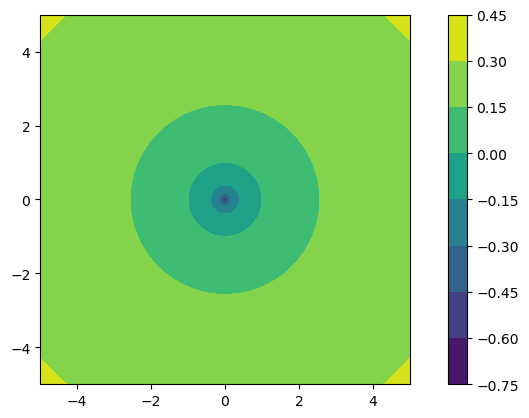

In [11]:
plt.figure()
plt.contourf(x, y, G)
plt.colorbar()
plt.axis("image")

We can also, add several point loads

In [12]:
A_x = -1
A_y = 0
B_x = 1
B_y = 0
r_A = np.sqrt((A_x - x)**2 + (A_y - y)**2)
r_B = np.sqrt((B_x - x)**2 + (B_y - y)**2)

In [13]:
G_A = green_pot_2d(r_A)
G_B = -green_pot_2d(r_B)

(np.float64(-5.0),
 np.float64(4.999999999999999),
 np.float64(-5.0),
 np.float64(4.999999999999999))

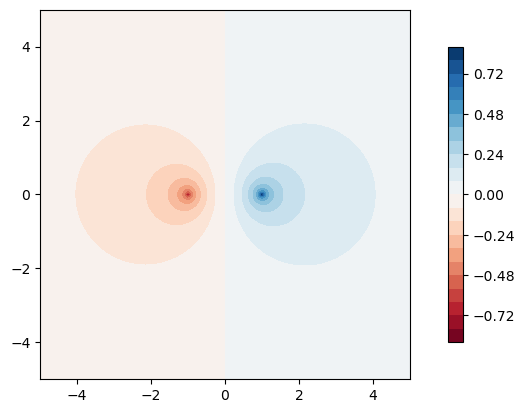

In [14]:
plt.figure()
plt.contourf(x, y, G_A + G_B, 25, cmap="RdBu")
plt.colorbar(shrink=0.8)
plt.axis("image")

## Flow visualization

The flow is given by

$$F(\mathbf{r}, \boldsymbol{\xi})
   = -\frac{\hat{\mathbf{r}}}{2\pi |\mathbf{r} - \boldsymbol{\xi}|} \, ,$$
   
with $\hat{\mathbf{r}}$ a unit vector from $\mathbf{r}$ to
$\boldsymbol{\xi}$.

In [15]:
def green_field_2d(r, unit_vec):
    """Derivative of the Green function for Laplace equation
    
    Parameters
    ----------
    r : float
        Distance between the two points.
    unit_vec : ndarray, float
        Unit vector from the source point to evaluation
        point.

    Returns
    -------
    E : float
        Flow field.
    """
    nx, ny = unit_vec
    Ex = -0.5*nx/(r * np.pi)
    Ey = -0.5*ny/(r * np.pi)
    return Ex, Ey

In [16]:
vec_A = np.array([A_x - x, A_y - y])
unit_vec_A = vec_A/r_A
vec_B = np.array([B_x - x, B_y - y])
unit_vec_B = vec_B/r_B

In [17]:
Ex_A, Ey_A = green_field_2d(r_A, unit_vec_A)
Ex_B, Ey_B = green_field_2d(r_B, unit_vec_B)
Ex = Ex_A - Ex_B
Ey = Ey_A - Ey_B

(-5.0, 5.0)

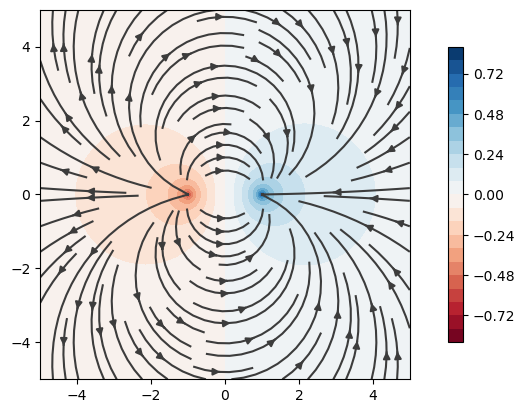

In [18]:
plt.figure()
plt.contourf(x, y, G_A + G_B, 25, cmap="RdBu")
plt.colorbar(shrink=0.8)
plt.streamplot(x, y , Ex, Ey, color="#3c3c3c")
plt.axis("image")
plt.xlim(-5, 5)
plt.ylim(-5, 5)